In [2]:
!pip install -q quandl

In [3]:
!pip install -U plotly

  Attempting uninstall: plotly
    Found existing installation: plotly 5.1.0
    Uninstalling plotly-5.1.0:
      Successfully uninstalled plotly-5.1.0


In [1]:
import pandas as pd
import numpy as np
import quandl
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# API Key QUANDL: RrjaojAKXBsWh5yQA9zd

In [3]:
quandl.get("BCB/433")

,Value
Date,
1980-01-31,6.62
1980-02-29,4.62
1980-03-31,6.04
1980-04-30,5.29
1980-05-31,5.70
...,...
2021-11-30,0.95
2021-12-31,0.73
2022-01-31,0.54


In [4]:
IPCA = quandl.get("BCB/433")

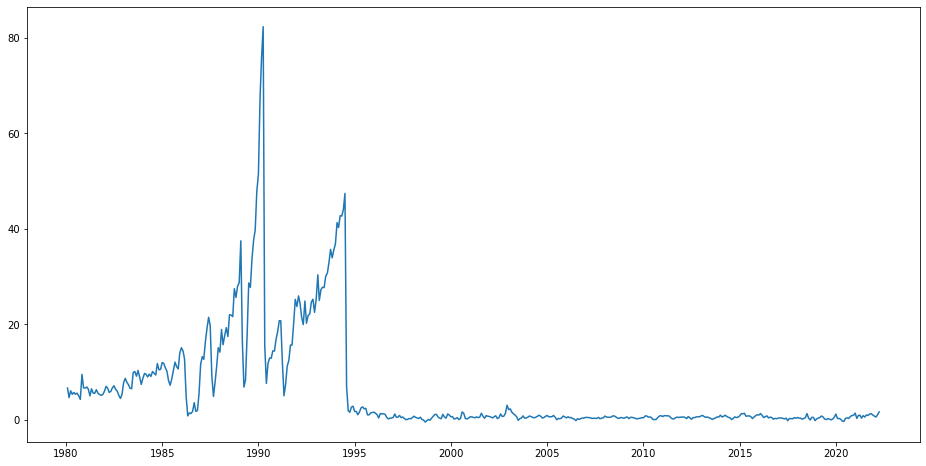

In [5]:
plt.figure(figsize=(16,8))
plt.plot(IPCA)

In [6]:
sp500 = quandl.get(["MULTPL/SHILLER_PE_RATIO_MONTH", "MULTPL/SP500_INFLADJ_MONTH"]).dropna()
sp500.columns = ['SHILLER', 'SP500']

In [7]:
sp500['logSP500'] = np.log(sp500['SP500']).diff()
sp500

,SHILLER,SP500,logSP500
Date,,,
1871-02-01,10.92,99.43,NaN
1871-03-01,11.19,100.38,0.009509
1871-04-01,12.05,107.07,0.064520
1871-05-01,12.59,112.38,0.048403
1871-06-01,12.59,113.20,0.007270
...,...,...,...
2022-02-01,35.98,4435.98,-0.017778
2022-02-28,35.80,4373.94,-0.014084
2022-03-01,34.69,4281.21,-0.021429


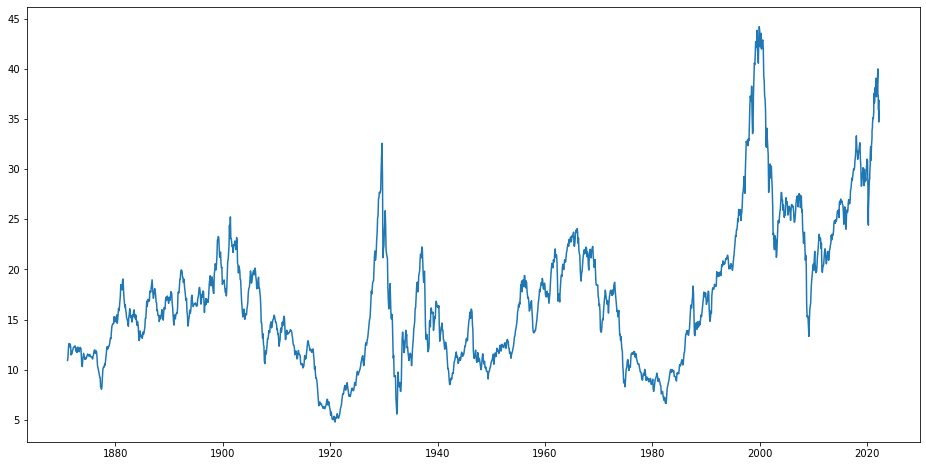

In [8]:
plt.figure(figsize=(16,8))
plt.plot(sp500['SHILLER'])

# Janelas de 10 anos

In [30]:
sp500['10yRetAnual'] = sp500['logSP500'].rolling(120).mean()*12

In [31]:
sp500['10ySHILLER'] = sp500['SHILLER'].shift(120)

In [34]:
sp500.tail()

,SHILLER,SP500,logSP500,10yRetAnual,10ySHILLER
Date,,,,,
2021-08-01,38.44,4450.37,0.020944,0.099000,20.90
2021-08-31,39.06,4522.68,0.016117,0.098370,21.24
2021-09-01,39.07,4524.09,0.000312,0.094692,21.90
2021-09-30,37.20,4307.54,-0.049049,0.088470,22.05
2021-10-01,37.63,4357.04,0.011426,0.087358,22.42


In [36]:
sp500.groupby(pd.cut(sp500['10ySHILLER'], [0,15,30,45]))['10yRetAnual'].describe()

,count,mean,std,min,25%,50%,75%,max
10ySHILLER,,,,,,,,
"(0, 15]",799.0,0.035484,0.050175,-0.102722,0.005753,0.042629,0.071793,0.128658
"(15, 30]",850.0,0.014573,0.046615,-0.108842,-0.022131,0.018756,0.045594,0.126858
"(30, 45]",57.0,-0.029317,0.028743,-0.078036,-0.051801,-0.030037,-0.011474,0.028476


In [38]:
sp500[['10yRetAnual','10ySHILLER']].corr()

,10yRetAnual,10ySHILLER
10yRetAnual,1.000000,-0.348293
10ySHILLER,-0.348293,1.000000


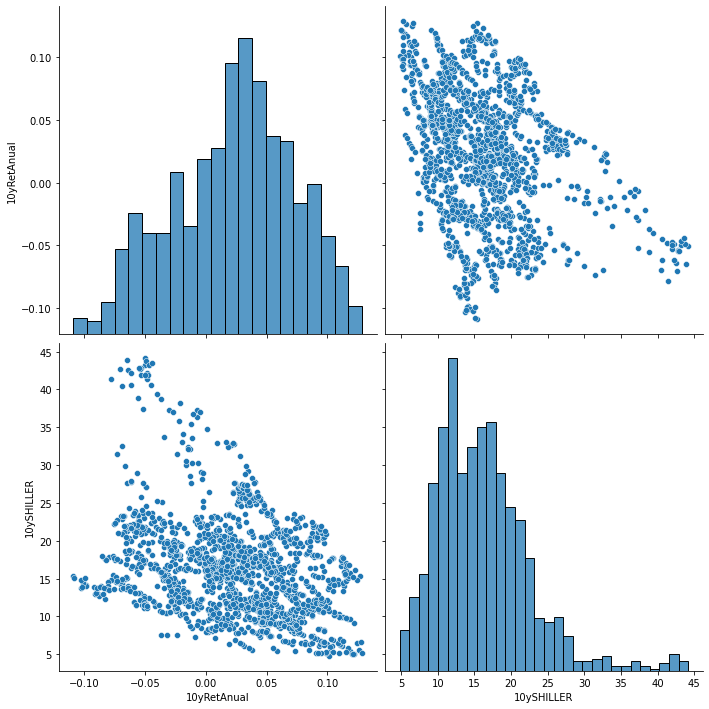

In [40]:
sns.pairplot(sp500[['10yRetAnual','10ySHILLER']], height=5);